## Clustering Methods - Comparison

### Objectives:
1. Illustrate KMeans  Clustering
2. Use Elbow Method as a way to find optimum number of clusters
3. Illustrate Agglomerative Hierarchical Clustering on Iris Dataset, considering only two features - Sepal Length and Petal Width.

### Problem Statement:
Clustering method to classified species of Iris dataset.

### Approach :
Most of the part of the questions in this lab needed data visualization and data modelling, so use seaborn and matplotlib, sklearn library of python to work out the given questions. And also use scipy for identifying outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df = sns.load_dataset("iris")

In [3]:
iris_df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Heatmap

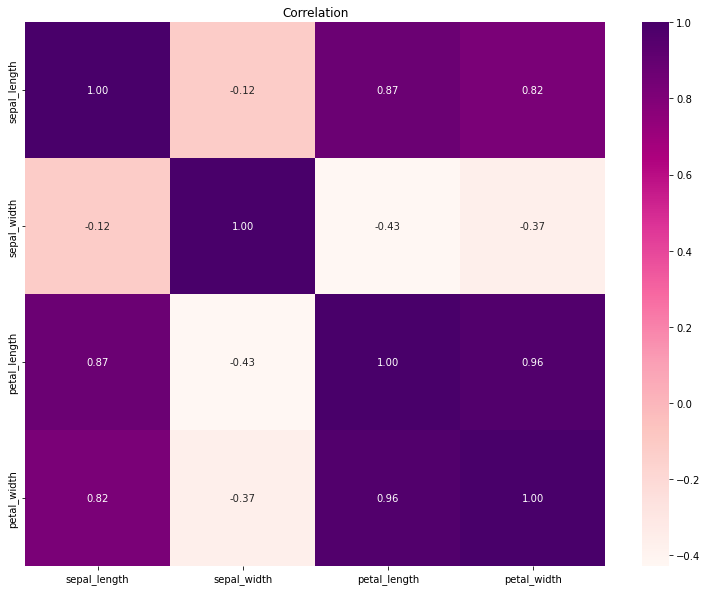

In [5]:
plt.figure(figsize=(13,10))
col=iris_df.corr()
sns.heatmap(col,annot=True,fmt='.2f',cmap="RdPu");
plt.title("Correlation")
plt.show()

In [6]:
len(iris_df)

150

### Scatter plot


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

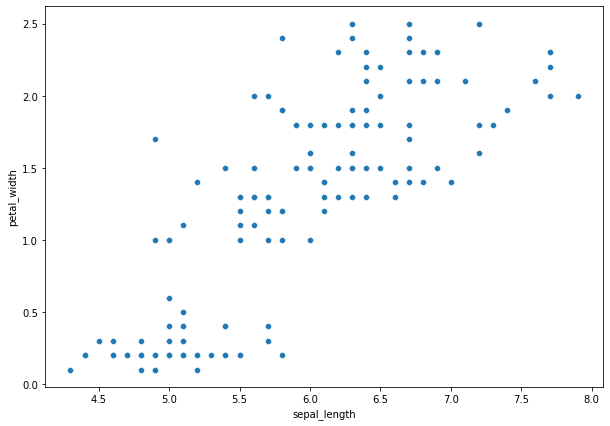

In [7]:
fig = plt.figure(figsize = (10, 7))
#sns.set(style='whitegrid')
sns.scatterplot(x="sepal_length",y="petal_width",data=iris_df)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

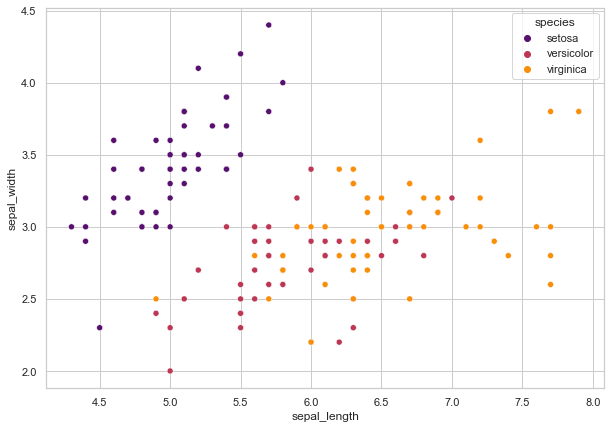

In [8]:
fig = plt.figure(figsize = (10, 7))
sns.set(style='whitegrid')
sns.scatterplot(x="sepal_length",
                    y="sepal_width",hue='species',
                    data=iris_df, palette="inferno")

**Inference:**
For Iris setosa we can see an positive linear relationship between the 2 variables i.e Sepal Length and Sepal Width.<br>
For Iris versicolor and Iris virginica we can say that there is weak positive correlation between the two variables Sepal Length and Sepal Width.


### Joint Plot

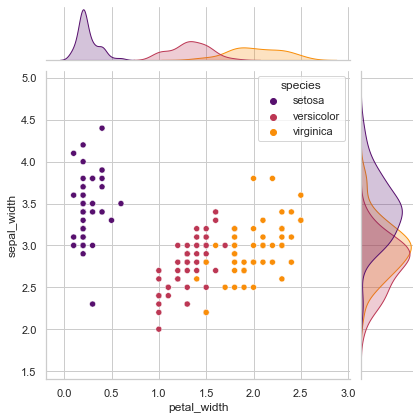

In [9]:
sns.jointplot(x ='petal_width',y ='sepal_width',hue="species",palette="inferno", data = iris_df)

**Inference:** After the petal length of 1 We can spot positive linear relationship between the two variables i.e Sepal Width and Petal Width 

### Pairplot
It represents pairwise relation across the entire dataframe and supports an additional argument called hue for categorical separation. What it does basically is create a jointplot between every possible numerical column and takes a while if the dataframe is really huge.

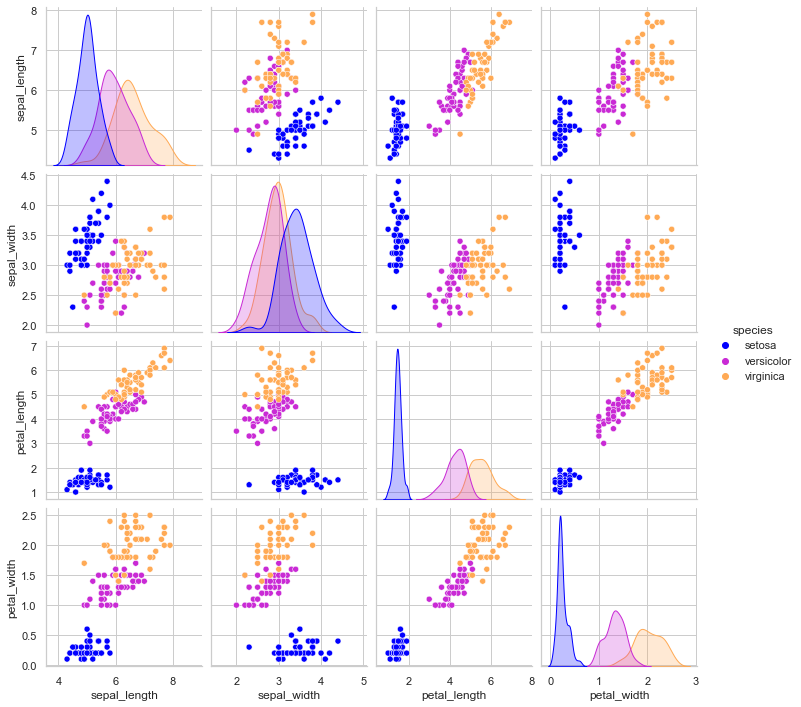

In [10]:
sns.pairplot(iris_df, hue ="species", palette ='gnuplot2')

**Inference:**<br>
For Iris Setosa: Septal length and sepal width has positive correlation, and also for petal length and petal width.
For Iris Versicolor: Each and Every variable has an has positively correlation.
For Iris Virginia: Each and Every variable has an has positively correlation.

### Violin Plot

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

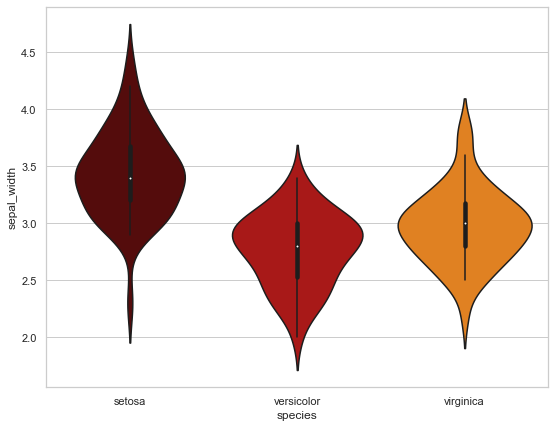

In [11]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize =(9, 7))
sns.violinplot(ax = ax, x = iris_df["species"], 
                  y = iris_df["sepal_width"] ,palette="gist_heat")

**Inference:** Iris setosa has more sepal width than that of otheres, followed by Iris virginca and lastly Iris versicolor.

### Boxplot

In [12]:
df_1=pd.melt(iris_df[["petal_width","petal_length","sepal_width","sepal_length"]])

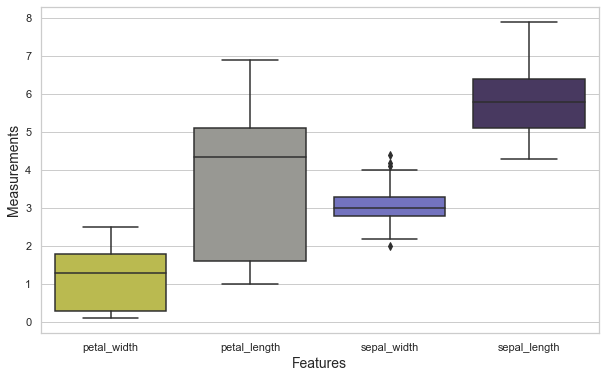

In [13]:
plt.figure(figsize=(10,6))

boxplot1=sns.boxplot(x="variable", y="value", data=df_1, palette="gist_stern_r")
boxplot1.set_xlabel("Features", fontsize=14)
boxplot1.set_ylabel("Measurements", fontsize=14)

plt.show()

**Inference:** The average sepal length is more than the other features followed by petal length, sepal width and lastly petal width

### FacetGrid Plots

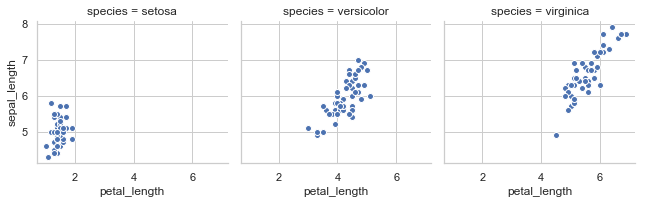

In [14]:
graph = sns.FacetGrid(iris_df, col ="species")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "petal_length", "sepal_length", edgecolor ="w").add_legend()
# show the object
plt.show()
  

**Inference:** We can spot an positive realtionship between the 2 variables i.e sepal Length and Petal Length for Iris versicolor and Iris virginica. <br> Also there are no data points which belong to iris setosa and has petal length more than 2. and sepal Length and Petal Length for Iris setosa has weak positive relationship. 

### Label Encoding
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [15]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
iris_df['species']= label_encoder.fit_transform(iris_df['species'])

### Splitting the dataset into Dependent and Independent variables.

In [16]:
X=iris_df[['sepal_length', 'petal_width']]
y=iris_df['species']
X.head()

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


### KMeans Clustering 

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(3)
kmeans.fit(X)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
identified_clusters = kmeans.fit_predict(X)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Using Elbow Method to find optimum number of clusters

**inertia_:** Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
When we plot the inertia_ with the K value, the plot looks like an Elbow. As the number of clusters increases, the inertia_ value will start to decrease. inertia_ value is largest when K = 1.

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

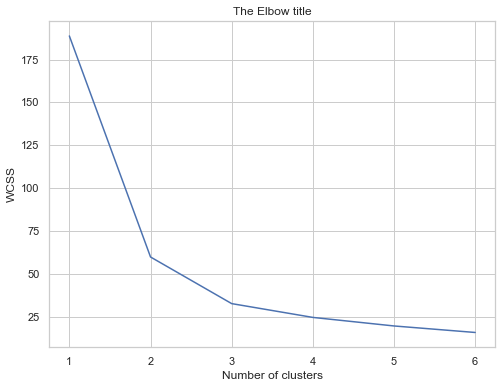

In [20]:
distance=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    distance_iter = kmeans.inertia_
    distance.append(distance_iter)

number_clusters = range(1,7)    
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(number_clusters,distance)
ax.set(title='The Elbow title', 
      xlabel='Number of clusters', 
      ylabel='WCSS');


**Inference:** From the figure we can say that the optimum clusters is where the elbow occurs (K=3)
This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset with K=3.

### Scatter Plot for Sepal Length and Petal Width after Clustering

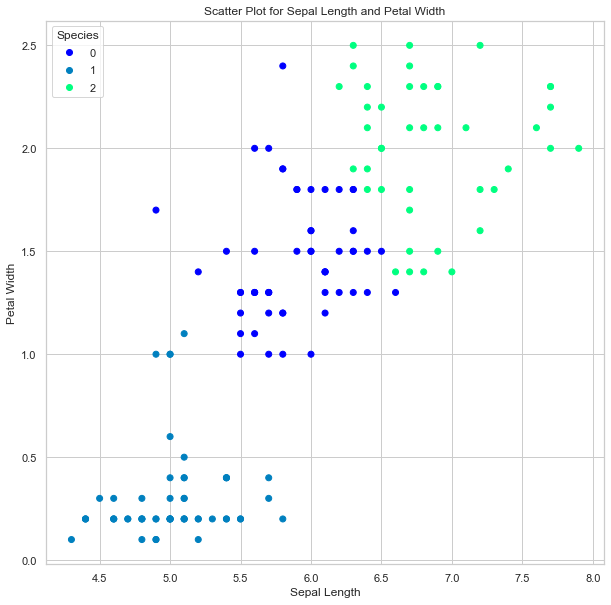

In [21]:
data_with_clusters = X.copy()
data_with_clusters['Clusters'] = identified_clusters 

fig, ax= plt.subplots(figsize=(10,10))

scatter=ax.scatter(data_with_clusters['sepal_length'],
           data_with_clusters['petal_width'],
           c=data_with_clusters['Clusters'],
           cmap='winter')

ax.set(title='Scatter Plot for Sepal Length and Petal Width', 
       xlabel='Sepal Length', 
       ylabel='Petal Width')

ax.legend(*scatter.legend_elements(), title='Species');


**Inference:** We can get an absolute segmentation when we put higher K values but if the points with in each cluster are very less then the variation on the real data will be high leading it into over simplifying the data. So, with K=3 we have obtained an optimal distortion/inertia with which we can segment the data into 3 different clusters with minimal error in segmentation

## Agglomerative Hierarchical Clustering 

### Dendogram
A dendrogram is a type of tree diagram showing hierarchical clustering — relationships between similar sets of data. They are frequently used in biology to show clustering between genes or samples, but they can represent any type of grouped data.

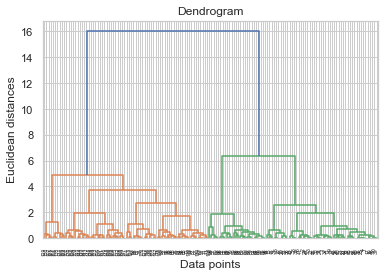

In [22]:
 # importing scipy.cluster.hierarchy for dendrogram
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') 
plt.xlabel('Data points')
plt.ylabel('Euclidean distances') 
plt.show() 

**INFERENCE:** If you are aware of this method, you can see in the above diagrams. The combination of 2 lines are not joined on the Y-axis from 6 to 16. So, the optimal number of clusters will be 2 for hierarchical clustering.

In [23]:
# optimal number of clusters from dendogram is 2
from sklearn.cluster import AgglomerativeClustering
opt_Agg_hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
opt_y_hc = opt_Agg_hc.fit_predict(X)

In [24]:
data_with_clusters1 = X.copy()
data_with_clusters1['Clusters'] = opt_y_hc 

In [25]:
def scatterplot(newdata):
    fig, (ax0,ax1)= plt.subplots(nrows=1, 
                                 ncols=2, 
                                 figsize=(20,8))

    scatter0=ax0.scatter(X['sepal_length'],
                         X['petal_width'],
                         c=y, cmap='winter')

    ax0.set(title='Actual', 
           xlabel='Sepal Length', 
           ylabel='Petal Width')

    ax0.legend(*scatter0.legend_elements(), title='Species');

    scatter1=ax1.scatter(newdata['sepal_length'],
                         newdata['petal_width'],
                         c=newdata['Clusters'],
                         cmap='rainbow')

    ax1.set(title='Predicted', 
            xlabel='Sepal Length', 
            ylabel='Petal Width')

    ax1.legend(*scatter1.legend_elements(), title='new_labels');


    fig.suptitle("Actual vs Predicted Scatter plot for Sepal Length and Petal Width", 
                 fontsize=16, 
                 fontweight='bold');

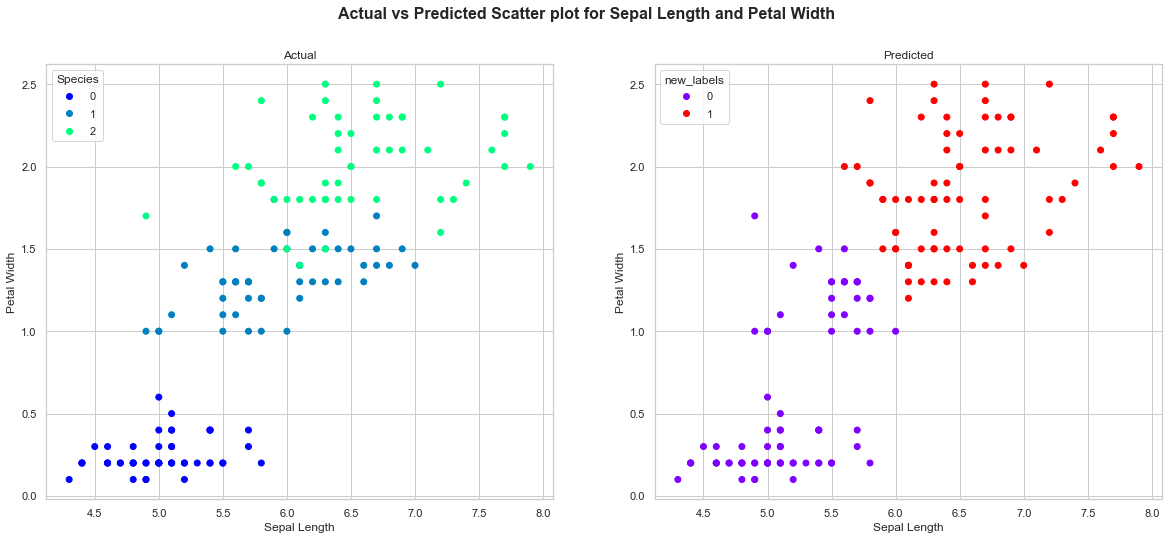

In [26]:
scatterplot(data_with_clusters1)

**INFERENCE:** On the left is the actual scatter plot without clustering, and there are datapoints colliding within different clusters. While on the left that is the predicted clusters the datapoints are accurately classified and clustered into 2 groups. But visually we can spot datapoints which can be another cluster, so I made an model for n_clusters=3.  

### For n_clusters=3

In [27]:
Agg_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(X) 

In [28]:
data_with_clusters2 = X.copy()
data_with_clusters2['Clusters'] = y_hc 

### Actual vs Predicted Scatter plot for Sepal Length and Petal Width

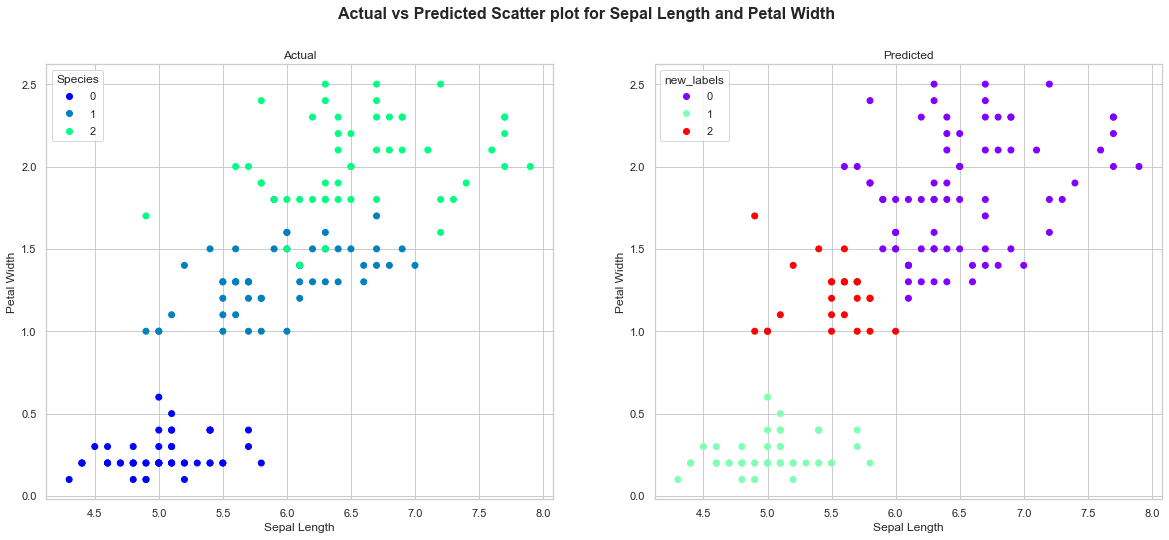

In [29]:
scatterplot(data_with_clusters2)

**INFERENCE:** On the left is the actual scatter plot without clustering, and there are datapoints colliding within different clusters. While on the left that is the predicted clusters the datapoints are accurately classified and clustered into 3 groups.

### Conclusion:
Linear Regression is an fundamental supervised Machine Learning algorithm and is important to start of ML with this algorithm.<br>
The things I learned from this lab are:
1. Implementing KMeans and Agglomerative Hierarchical Clustering in python 
2. Interpreting dendogram
3. Use of Elbow method to optimize number of clusters